# Algotytm przecinania się odcinków na płaszczyźnie

In [22]:
import numpy as np
import pandas as pd
import matplotlib
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [23]:
def draw_example_1():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

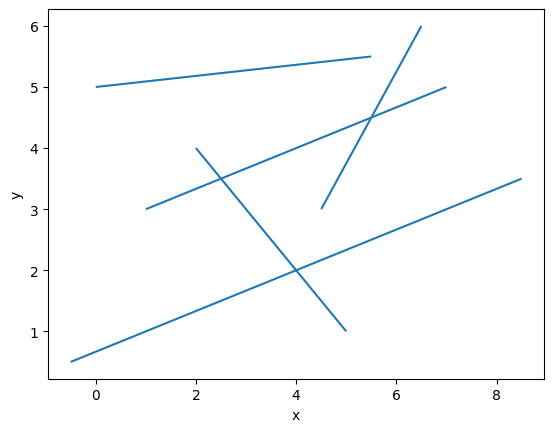

In [26]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

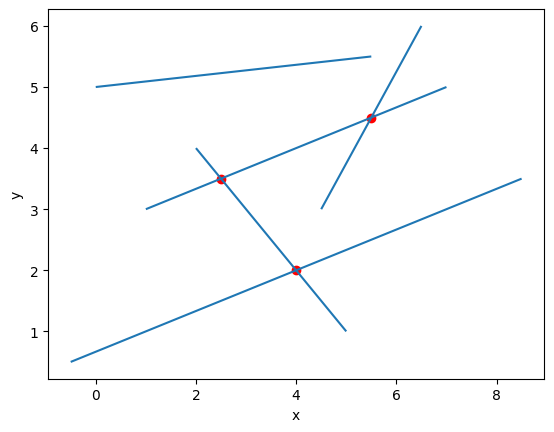

In [25]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [27]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    points = []
    for i in range(n):
        x1 = np.random.uniform(0,max_x,1)[0]
        y1 = np.random.uniform(0,max_y,1)[0]
        x2 = np.random.uniform(0,max_x,1)[0]
        y2 = np.random.uniform(0,max_y,1)[0]
        points.append(((x1,y1),(x2,y2)))
    return points

In [28]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.156s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [29]:
section = generate_uniform_sections(1000,1000,20)

Zwizualizuj otrzymane odcinki

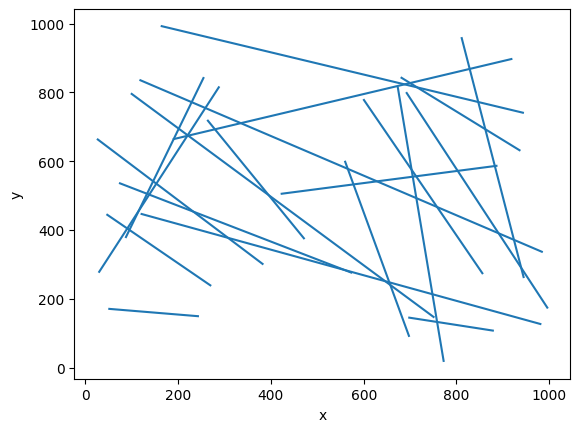

In [30]:
vis = Visualizer()
for i in section:
    vis.add_line_segment(i)
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [31]:
import matplotlib.pyplot as plt
%matplotlib tk

def add_sections(sections):   
    segments = []
    lines = None
    flag = False
    part_segment = None

    def onclick(event):
        nonlocal segments,lines,sections,flag,part_segment
        if event.button == 1 and len(segments) < sections:
            x,y = event.xdata,event.ydata
            if not flag:
                part_segment = (x,y)
                ax.scatter(x, y,color='b',marker='o')
                plt.draw()
                flag = True
            else:
                ax.plot((part_segment[0],x), (part_segment[1],y), marker='o', linestyle='-', color='b')
                segments.append((part_segment,(x,y)))
                plt.draw()
                flag = False

        elif event.button == 3:  
            fig.canvas.mpl_disconnect(cid)
            plt.close()

    # Tworzenie wykresu
    fig, ax = plt.subplots()
    ax.set_xlim((0,1000))
    ax.set_ylim((0,1000))
    ax.set_title("Stwórz " + str(sections) +" odcinków")

    # Dodanie obserwatora zdarzeń kliknięcia myszy
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()
    return segments  

# segments = add_sections(5)


%matplotlib inline

Uzupełnij funkcję ```is_intersection```

In [90]:
class Node:
    def __init__(self, key,segment):
        self.key = key
        self.left_point = segment[0]
        self.right_point = segment[1]
        self.left = None
        self.right = None

def insert(root,key,segment):
    node = Node(key,segment)
    return insert_node(root,node)

def insert_node(root, node):
    if root is None:
        return node
    else:
        if node.key < root.key:
            root.left = insert_node(root.left, node)
        else:
            root.right = insert_node(root.right, node)
    return root

def minValueNode(node):
    current = node
    while current.left is not None:
        current = current.left
    return current

def deleteNode(root, key):
    if root is None:
        return root

    if key < root.key:
        root.left = deleteNode(root.left, key)
    elif key > root.key:
        root.right = deleteNode(root.right, key)
    else:
        if root.left is None:
            return root.right
        elif root.right is None:
            return root.left

        tmp_node = minValueNode(root.right)
        root.key = tmp_node.key
        root.left_point = tmp_node.left_point
        root.right_point = tmp_node.right_point
        root.right = deleteNode(root.right, root.key)

    return root

def printTree(root):
    if root:
        printTree(root.left)
        print(root.key,root.left_point)
        printTree(root.right)

def findPrev(root, key):
    Previous = None

    while root is not None:
        if root.key >=key:
            root = root.left
        else:
            Previous = root
            root = root.right

    return Previous

def findNext(root, key):
    Next = None

    while root is not None:
        if root.key <= key:
            root = root.right
        else:
            Next = root
            root = root.left

    return Next

# # Przykład użycia:
# root = None
# keys_to_insert = [50, 30, 20, 40, 70, 60, 80]

# # Wstawianie kluczy
# for key in keys_to_insert:
#     root = insert(root, key,((1,1),(0,0)))

# print("Drzewo BST po wstawieniu:")
# printTree(root)

# # Usuwanie klucza
# key_to_delete = 30
# root = deleteNode(root, key_to_delete)

# print("\nDrzewo BST po usunięciu klucza {}: ".format(key_to_delete))
# printTree(root)
# print(findNext(root,10).key)


In [33]:
def determinant(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1]) - (a[1]-c[1])*(b[0]-c[0])
def orientation(a,b,c,eps = 10**(-25)):
    det = determinant(a,b,c)
    if det < -eps:
        return -1
    if det > eps:
        return 1
    else:
        return 0

In [34]:
def intersection_segment(p1,p2):
    orient1 = orientation(p1[0],p1[1],p2[0])    
    orient2 = orientation(p1[0],p1[1],p2[1])
    orient3 = orientation(p2[0],p2[1],p1[0])
    orient4 = orientation(p2[0],p2[1],p1[1])
    return (orient1 != orient2) and (orient3 != orient4)

In [35]:
def is_intersection(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina 
    :param sections: tablica odcinków w postaci krotek krotek współrzędnych punktów końcowych odcinków
    :param eps: epsilon będący dokładnością, z jaką porównujemy liczby zmiennoprzecinkowe
    :return: True / False
    """
    Q = None
    for i in sections:
        if i[0][0] > i[1][0]:
            i = (i[1],i[0]) 
        Q = insert(Q,i[0][0],i)
        Q = insert(Q,i[1][0],i)
    
    # printTree(Q)
    T = None
    while Q:
        curr_node = minValueNode(Q)
        Q = deleteNode(Q,curr_node.key)
        if curr_node.key == curr_node.left_point[0]:
            T = insert(T,curr_node.left_point[1],(curr_node.left_point,curr_node.right_point))
            prev_node = findPrev(T,curr_node.left_point[1])
            if prev_node != None:
                if intersection_segment((curr_node.left_point,curr_node.right_point),(prev_node.left_point,prev_node.right_point)):
                    return True
        else:
            prev_node = findPrev(T,curr_node.left_point[1])
            next_node = findNext(T,curr_node.left_point[1])
            T = deleteNode(T,curr_node.left_point[1])
            if prev_node != None and next_node != None:
                if intersection_segment((next_node.left_point,next_node.right_point),(prev_node.left_point,prev_node.right_point)):
                    return True
                    

    return False
                
                



In [36]:
Test().runtest(2, is_intersection)

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.000s


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

Odpowiedź here

Uzupełnij funkcję ```is_intersection_with_visualization```

In [37]:
def is_intersection_with_visualization(sections):
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    Q = None
    vis = Visualizer()
    for i in sections:
        if i[0][0] > i[1][0]:
            i = (i[1],i[0]) 
        Q = insert(Q,i[0][0],i)
        Q = insert(Q,i[1][0],i)
        vis.add_line_segment(i)
        
    # printTree(Q)
    T = None
    while Q:
        curr_node = minValueNode(Q)
        Q = deleteNode(Q,curr_node.key)

        last_line = vis.add_line(((curr_node.key,0),(curr_node.key,1)),color="red")
        if curr_node.key == curr_node.left_point[0]:
            point = vis.add_point(curr_node.left_point,color="red")
            vis.add_line_segment((curr_node.left_point,curr_node.right_point),color="green")
        else:
            point = vis.add_point(curr_node.right_point,color="red")
            vis.add_line_segment((curr_node.left_point,curr_node.right_point),color="blue")

        if curr_node.key == curr_node.left_point[0]:
            T = insert(T,curr_node.left_point[1],(curr_node.left_point,curr_node.right_point))
            prev_node = findPrev(T,curr_node.left_point[1])

            if prev_node != None:
                if intersection_segment((curr_node.left_point,curr_node.right_point),(prev_node.left_point,prev_node.right_point)):
                    return (True,vis)
        else:
            prev_node = findPrev(T,curr_node.left_point[1])
            next_node = findNext(T,curr_node.left_point[1])
            T = deleteNode(T,curr_node.left_point[1])

            if prev_node != None and next_node != None:
                vis.add_line_segment((prev_node.left_point,prev_node.right_point),color="purple")
                vis.add_line_segment((next_node.left_point,next_node.right_point),color="purple")
                if intersection_segment((next_node.left_point,next_node.right_point),(prev_node.left_point,prev_node.right_point)):
                    return (True,vis)
                vis.add_line_segment((prev_node.left_point,prev_node.right_point),color="green")
                vis.add_line_segment((next_node.left_point,next_node.right_point),color="green")
            
        vis.remove_figure(last_line)
        vis.remove_figure(point)

    return (False,vis)


In [41]:
%matplotlib tk
sect = add_sections(5)
%matplotlib inline

In [42]:
sect2 = sorted(sect)
result, vis = is_intersection_with_visualization(sect)
print(result)

False


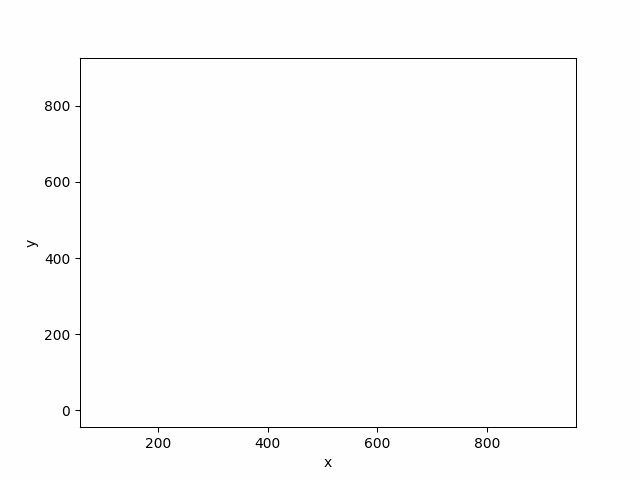

In [43]:
vis.show_gif()

Uzupełnij funkcję ```find_intersections```

In [44]:
def intersect_point(p1,p2):
    """
    A1x + B1y = C1
    A2x + B2y = C2
    A = (y2-y1)
    B = (x2-x1)
    """
    A1 = p1[0][1] - p1[1][1]
    A2 = p2[0][1] - p2[1][1]
    B1 = p1[1][0] - p1[0][0]
    B2 = p2[1][0] - p2[0][0]
    C1 = A1*p1[1][0] + B1*p1[1][1]
    C2 = A2*p2[1][0] + B2*p2[1][1]
    det = A1*B2 - A2*B1
    det_x = C1*B2 - C2*B1
    det_y = A1*C2 - C1*A2
    return (det_x/det,det_y/det)

def line_value(p1,x):
    A = p1[0][1] - p1[1][1]
    B = p1[0][0] - p1[1][0]
    a = A/B
    b = p1[0][1] - a*p1[0][0]
    return a*x+b

def find(root, key):
    if root is None or root.key == key:
        return root
    if key < root.key:
        return find(root.left, key)
    return find(root.right, key)

def validate_event(node):
    if node.left_point[0] != node.key:
        return node.left_point[0]
    return node.key
    

In [45]:
print(intersect_point(((1,0),(-1,2)),((0,0),(3,3))))

(0.5, 0.5)


In [135]:
def find_intersections(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    def check(x,y):

        nonlocal Q,result,sections,curr_node   
        if intersection_segment(x,y):
            inter = intersect_point(x,y)
            if find(Q,inter[0]) == None and curr_node.key < inter[0]:
                Q = insert(Q,inter[0],(min(x[0],y[0]),max(x[0],y[0])))
                result.append((inter,min(sections.index(x)+1,sections.index(y)+1),max(sections.index(x)+1,sections.index(y)+1)))
    

    result = []
    Q = None
    changed_points = {}
    vis = Visualizer()
    
    for i in sections:
        if i[0][0] > i[1][0]:
            i = (i[1],i[0]) 
        Q = insert(Q,i[0][0],i)
        Q = insert(Q,i[1][0],i)
        vis.add_line_segment(i)
    
    T = None
    while Q:
        # if T is not None:
            # printTree(T)
            # print("")
        curr_node = minValueNode(Q)
        Q = deleteNode(Q,curr_node.key)
        
        last_line = vis.add_line(((curr_node.key,0),(curr_node.key,1)),color="red")
        point = vis.add_point(curr_node.left_point,color="red")
        if curr_node.key == curr_node.left_point[0]:
            vis.add_line_segment((curr_node.left_point,curr_node.right_point),color="green")
        else:
            vis.add_line_segment((curr_node.left_point,curr_node.right_point),color="blue")
        
        if curr_node.left_point[0] != curr_node.key and curr_node.right_point[0] != curr_node.key and(curr_node.left_point not in changed_points or curr_node.key != changed_points[curr_node.left_point]):

            if min(curr_node.left_point,curr_node.right_point,key=lambda x : x[1]) in changed_points:
                f1 = changed_points[min(curr_node.left_point,curr_node.right_point,key=lambda x : x[1])]
            else:
                f1 = min(curr_node.left_point[1],curr_node.right_point[1])
            if max(curr_node.left_point,curr_node.right_point,key= lambda x:x[1]) in changed_points:
                f2 = changed_points[max(curr_node.left_point,curr_node.right_point,key= lambda x:x[1])]
            else:
                f2 = max(curr_node.left_point[1],curr_node.right_point[1])
            
            # print(f1,f2)
            first = find(T,f1)
            second = find(T,f2)
            # print(first,second)
            prev_node = findPrev(T,first.key)
            next_node = findNext(T,second.key)
            inter = intersect_point((first.left_point,first.right_point),(second.left_point,second.right_point))
            
            first_key = inter[1]+10**(-6)
            first_left_point = first.left_point
            first_right_point = first.right_point
            changed_points[first_left_point] = first_key
            
            second_key = inter[1]-10**(-6)
            second_left_point = second.left_point
            second_right_point = second.right_point
            changed_points[second_left_point] = second_key

            T = deleteNode(T,first.key)
            T = deleteNode(T,second.key)
            T = insert(T,first_key,(first_left_point,first_right_point))
            T = insert(T,second_key,(second_left_point,second_right_point))

            if next_node != None:
                # print(next_node.key)
                check((first_left_point,first_right_point),(next_node.left_point,next_node.right_point))

            if prev_node != None:
                # print(prev_node.key)
                check((second_left_point,second_right_point),(prev_node.left_point,prev_node.right_point))

        elif curr_node.key == curr_node.left_point[0]:

            T = insert(T,curr_node.left_point[1],(curr_node.left_point,curr_node.right_point))
            prev_node = findPrev(T,curr_node.left_point[1])
            next_node = findNext(T,curr_node.left_point[1])
            if prev_node != None:

                check((curr_node.left_point,curr_node.right_point),(prev_node.left_point,prev_node.right_point))

            if next_node != None:

                check((curr_node.left_point,curr_node.right_point),(next_node.left_point,next_node.right_point))
        else:
            if curr_node.left_point in changed_points:
                is_changed = changed_points[curr_node.left_point]
            else:
                is_changed = curr_node.left_point[1]
            # print(is_changed,0)
            prev_node = findPrev(T,is_changed)
            next_node = findNext(T,is_changed)
            T = deleteNode(T,is_changed)
            if prev_node != None and next_node != None:
                
                check((next_node.left_point,next_node.right_point),(prev_node.left_point,prev_node.right_point))
                    
        vis.remove_figure(last_line)
    return result

In [47]:
%matplotlib tk
test = add_sections(6)
%matplotlib inline

In [48]:
tmp = find_intersections(test)
print(tmp)

[(548.4295598981195, 418.8605169584473), (751.0447792260654, 519.9719862395516), (548.4295598981195, 418.8605169584473), (548.4295598981195, 418.8605169584473)]


In [136]:
Test().runtest(3, find_intersections)

Lab 4, task 3:
	Test 1: WRONG ANSWER
		Output:   [((-0.001674379051665806, -0.007263586832941074), 1, 2), ((0.011526074740254208, 0.00613280129642243), 2, 3), ((0.011860591253227502, -0.018140143229495417), 1, 3), ((0.0223444511307787, 0.017111754849194877), 2, 4), ((0.02265867063122986, -0.02681736354721217), 1, 4)]
		Expected: ['-0.0016743790516658117 -0.007263586832941072 1 2', '0.011526074740254208 0.006132801296422439 2 3', '0.011860591253227505 -0.018140143229495424 1 3', '0.022344451130778698 0.01711175484919488 2 4', '0.022658670631229855 -0.026817363547212168 1 4']
	Test 2: WRONG ANSWER
		Output:   [((0.013332591183346308, -0.01619339562692305), 3, 4), ((0.005806934807635711, -0.016556444720678153), 2, 3), ((0.010025601838031016, -0.020988202988542273), 2, 4)]
		Expected: ['0.005806934807635715 -0.016556444720678153 2 3', '0.010025601838031018 -0.020988202988542273 2 4', '0.013332591183346312 -0.01619339562692305 3 4']
	Test 3: Passed
Result: 1/3
Time: 0.000s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [127]:
def find_intersections_with_visualization(sections):
    """
    Funkcja znajduje wszystkie przecięcia zadanych odcinków i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: tablica punktów przecięć w postaci trzyelementowych krotek w których pierwszym elementem są współrzędne danego punktu, a drugim i trzecim indeksy prostych z listy wejściowej, które się przecinają w tym punkcie współrzędnych np.:
    [((x1, y1), id1,id2),
    ((x2, y2), id3, id4),
    ...]
    """
    def check(x,y):

        nonlocal Q,result,sections,curr_node   
        if intersection_segment(x,y):
            inter = intersect_point(x,y)
            if find(Q,inter[0]) == None and curr_node.key < inter[0]:
                Q = insert(Q,inter[0],(min(x[0],y[0]),max(x[0],y[0])))
                result.append((inter,sections.index(x),sections.index(y)))
    

    result = []
    Q = None
    changed_points = {}
    vis = Visualizer()
    
    for i in sections:
        if i[0][0] > i[1][0]:
            i = (i[1],i[0]) 
        Q = insert(Q,i[0][0],i)
        Q = insert(Q,i[1][0],i)
        vis.add_line_segment(i)
    
    T = None
    while Q:
        if T is not None:
            printTree(T)
            print("")
        curr_node = minValueNode(Q)
        Q = deleteNode(Q,curr_node.key)
        
        last_line = vis.add_line(((curr_node.key,0),(curr_node.key,1)),color="red")
        point = vis.add_point(curr_node.left_point,color="red")
        if curr_node.key == curr_node.left_point[0]:
            vis.add_line_segment((curr_node.left_point,curr_node.right_point),color="green")
        else:
            vis.add_line_segment((curr_node.left_point,curr_node.right_point),color="blue")
        
        if curr_node.left_point[0] != curr_node.key and curr_node.right_point[0] != curr_node.key and(curr_node.left_point not in changed_points or curr_node.key != changed_points[curr_node.left_point]):

            if min(curr_node.left_point,curr_node.right_point,key=lambda x : x[1]) in changed_points:
                f1 = changed_points[min(curr_node.left_point,curr_node.right_point,key=lambda x : x[1])]
            else:
                f1 = min(curr_node.left_point[1],curr_node.right_point[1])
            if max(curr_node.left_point,curr_node.right_point,key= lambda x:x[1]) in changed_points:
                f2 = changed_points[max(curr_node.left_point,curr_node.right_point,key= lambda x:x[1])]
            else:
                f2 = max(curr_node.left_point[1],curr_node.right_point[1])
            
            # print(f1,f2)
            first = find(T,f1)
            second = find(T,f2)
            # print(first,second)
            prev_node = findPrev(T,first.key)
            next_node = findNext(T,second.key)
            inter = intersect_point((first.left_point,first.right_point),(second.left_point,second.right_point))
            
            first_key = inter[1]+10**(-6)
            first_left_point = first.left_point
            first_right_point = first.right_point
            changed_points[first_left_point] = first_key
            
            second_key = inter[1]-10**(-6)
            second_left_point = second.left_point
            second_right_point = second.right_point
            changed_points[second_left_point] = second_key

            T = deleteNode(T,first.key)
            T = deleteNode(T,second.key)
            T = insert(T,first_key,(first_left_point,first_right_point))
            T = insert(T,second_key,(second_left_point,second_right_point))

            if next_node != None:
                print(next_node.key)
                check((first_left_point,first_right_point),(next_node.left_point,next_node.right_point))

            if prev_node != None:
                print(prev_node.key)
                check((second_left_point,second_right_point),(prev_node.left_point,prev_node.right_point))

        elif curr_node.key == curr_node.left_point[0]:

            T = insert(T,curr_node.left_point[1],(curr_node.left_point,curr_node.right_point))
            prev_node = findPrev(T,curr_node.left_point[1])
            next_node = findNext(T,curr_node.left_point[1])
            if prev_node != None:

                check((curr_node.left_point,curr_node.right_point),(prev_node.left_point,prev_node.right_point))

            if next_node != None:

                check((curr_node.left_point,curr_node.right_point),(next_node.left_point,next_node.right_point))
        else:
            if curr_node.left_point in changed_points:
                is_changed = changed_points[curr_node.left_point]
            else:
                is_changed = curr_node.left_point[1]
            print(is_changed,0)
            prev_node = findPrev(T,is_changed)
            next_node = findNext(T,is_changed)
            T = deleteNode(T,is_changed)
            if prev_node != None and next_node != None:
                
                check((next_node.left_point,next_node.right_point),(prev_node.left_point,prev_node.right_point))
                    
        vis.remove_figure(last_line)
    return (result,vis)

In [106]:
%matplotlib tk
test = add_sections(6)
%matplotlib inline

0.019299425704806472 (-0.034729840063279685, 0.019299425704806472)

-0.03563317233440923 (-0.02962903361166678, -0.03563317233440923)
0.019299425704806472 (-0.034729840063279685, 0.019299425704806472)

-0.03563317233440923 (-0.02962903361166678, -0.03563317233440923)
-0.015412584099115098 (-0.024306452966505486, -0.015412584099115098)
0.019299425704806472 (-0.034729840063279685, 0.019299425704806472)

-0.015412584099115098 0
-0.03563317233440923 (-0.02962903361166678, -0.03563317233440923)
0.019299425704806472 (-0.034729840063279685, 0.019299425704806472)

-0.007264586832941074 (-0.034729840063279685, 0.019299425704806472)
-0.0072625868329410734 (-0.02962903361166678, -0.03563317233440923)

-0.007264586832941074 (-0.034729840063279685, 0.019299425704806472)
-0.0072625868329410734 (-0.02962903361166678, -0.03563317233440923)
0.031431778645982955 (0.01117741800123645, 0.031431778645982955)

-0.007264586832941074
-0.007264586832941074 (-0.034729840063279685, 0.019299425704806472)
0.006131

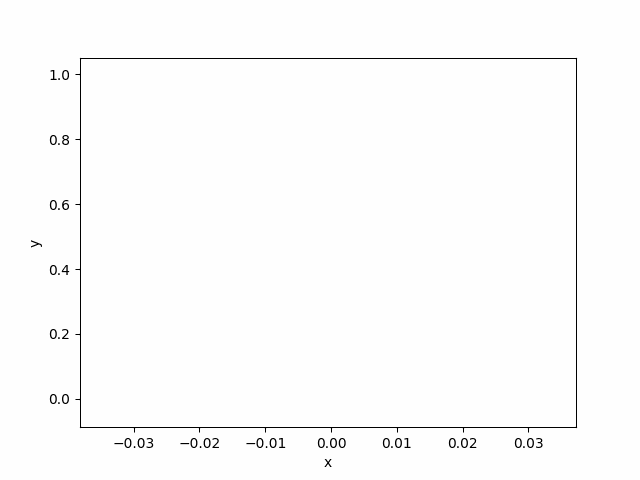

In [128]:
t1 = [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]
res,visr = find_intersections_with_visualization(t1)
visr.show_gif(interval=800)

425.32467532467535 (100.80645161290326, 425.32467532467535)

425.32467532467535 (100.80645161290326, 425.32467532467535)
709.4155844155845 (127.01612903225808, 709.4155844155845)

425.32467532467535 (100.80645161290326, 425.32467532467535)
709.4155844155845 (127.01612903225808, 709.4155844155845)
793.2900432900433 (161.29032258064515, 793.2900432900433)

709.4155844155845 0
425.32467532467535 (100.80645161290326, 425.32467532467535)
793.2900432900433 (161.29032258064515, 793.2900432900433)

659.499489321703 (161.29032258064515, 793.2900432900433)
659.499491321703 (100.80645161290326, 425.32467532467535)

566.017316017316 (518.1451612903226, 566.017316017316)
659.499489321703 (161.29032258064515, 793.2900432900433)
659.499491321703 (100.80645161290326, 425.32467532467535)

659.499491321703 0
566.017316017316 (518.1451612903226, 566.017316017316)
659.499489321703 (161.29032258064515, 793.2900432900433)

566.017316017316 (518.1451612903226, 566.017316017316)
659.499489321703 (161.29032258

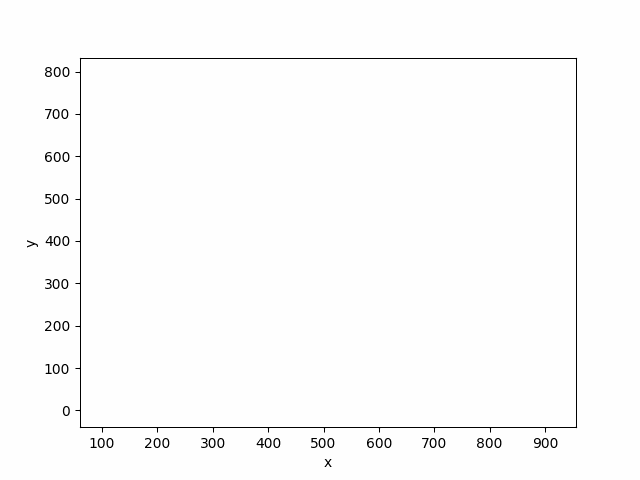

In [123]:
res,visr = find_intersections_with_visualization(test)
print(res)
visr.show_gif(interval=800)

### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [ ]:
# testing_sections = ???

In [ ]:
### Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Odpowiedź here

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.